In [2]:
import numpy as np

# Mendefinisikan fungsi gaya
def gaya(x):
  return 5 * x

# Mendefinisikan fungsi analitik untuk usaha
def usaha_analitik(a, b):
  return (5/3) * (b**3 - a**3)

# Fungsi untuk menghitung usaha dengan metode titik tengah
def usaha_titik_tengah(a, b, n):
  h = (b - a) / n
  x_midpoints = a + h / 2 + np.arange(1, n) * h
  return np.sum(h * gaya(x_midpoints))

# Fungsi untuk menghitung usaha dengan metode trapesium
def usaha_trapesium(a, b, n):
  h = (b - a) / n
  x_traps = np.linspace(a, b, n + 1)
  return h / 2 * (gaya(x_traps[0]) + 2 * np.sum(gaya(x_traps[1:-1])) + gaya(x_traps[-1]))

# Fungsi untuk menghitung usaha dengan metode Simpson
def usaha_simpson(a, b, n):
  h = (b - a) / n
  x_simpsons = a + h / 2 + np.arange(1, n + 1) * h
  f_simpsons = gaya(x_simpsons)
  return h / 6 * (f_simpsons[0] + f_simpsons[-1] + 4 * np.sum(f_simpsons[1:-1:2]) + 2 * np.sum(f_simpsons[2::2]))

# Menentukan interval integrasi
a = 0
b = 2

# Menentukan jumlah interval
interval_list = [10, 20, 50, 100, 200]

# Menghitung usaha dan error untuk semua metode dan interval
for n in interval_list:
  usaha_titik_tengah_val = usaha_titik_tengah(a, b, n)
  usaha_trapesium_val = usaha_trapesium(a, b, n)
  usaha_simpson_val = usaha_simpson(a, b, n)

  error_titik_tengah = abs(usaha_analitik(a, b) - usaha_titik_tengah_val)
  error_trapesium = abs(usaha_analitik(a, b) - usaha_trapesium_val)
  error_simpson = abs(usaha_analitik(a, b) - usaha_simpson_val)

  print(f"Jumlah interval: {n}")
  print(f"| Error Titik Tengah: {error_titik_tengah:.2e}")
  print(f"| Error Trapesium: {error_trapesium:.2e}")
  print(f"| Error Simpson: {error_simpson:.2e}")
  print("----------------------------------------------------------------------")

Jumlah interval: 10
| Error Titik Tengah: 3.43e+00
| Error Trapesium: 3.33e+00
| Error Simpson: 8.27e+00
----------------------------------------------------------------------
Jumlah interval: 20
| Error Titik Tengah: 3.36e+00
| Error Trapesium: 3.33e+00
| Error Simpson: 8.28e+00
----------------------------------------------------------------------
Jumlah interval: 50
| Error Titik Tengah: 3.34e+00
| Error Trapesium: 3.33e+00
| Error Simpson: 8.30e+00
----------------------------------------------------------------------
Jumlah interval: 100
| Error Titik Tengah: 3.33e+00
| Error Trapesium: 3.33e+00
| Error Simpson: 8.32e+00
----------------------------------------------------------------------
Jumlah interval: 200
| Error Titik Tengah: 3.33e+00
| Error Trapesium: 3.33e+00
| Error Simpson: 8.33e+00
----------------------------------------------------------------------


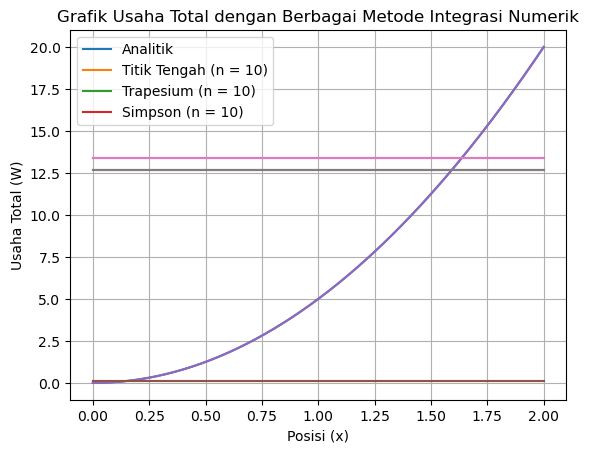

In [10]:
import matplotlib.pyplot as plt

def f(x):
  return 5 * x**2

def titik_tengah(a, b, n):
  h = (b - a) / n
  x = a + h / 2
  sum = 0
  for i in range(n):
    sum += f(x)
  return h * sum

def trapesium(a, b, n):
  h = (b - a) / n
  sum1 = f(a) + f(b)
  sum2 = 0
  for i in range(1, n):
    sum2 += f(a + i * h)
  return (h / 2) * (sum1 + 2 * sum2)

def simpson(a, b, n):
  h = (b - a) / n
  sum1 = f(a) + f(b)
  sum2 = 0
  sum3 = 0
  for i in range(1, n):
    sum2 += f(a + i * h)
    sum3 += f(a + i * h + h / 2)
  return (h / 6) * (sum1 + 4 * sum2 + 2 * sum3)

def main():
  a = 0
  b = 2
  x = np.linspace(a, b, 200)
  y_analitik = f(x)

  n = 10  # Set the desired number of intervals here
  y_titik_tengah = titik_tengah(a, b, n) * np.ones_like(x)
  y_trapesium = trapesium(a, b, n) * np.ones_like(x)
  y_simpson = simpson(a, b, n) * np.ones_like(x)

  plt.plot(x, y_analitik, label="Analitik")
  plt.plot(x, y_titik_tengah, label=f"Titik Tengah (n = {n})")
  plt.plot(x, y_trapesium, label=f"Trapesium (n = {n})")
  plt.plot(x, y_simpson, label=f"Simpson (n = {n})")

  plt.xlabel("Posisi (x)")
  plt.ylabel("Usaha Total (W)")
  plt.title("Grafik Usaha Total dengan Berbagai Metode Integrasi Numerik")
  plt.legend()
  plt.grid()
  # Uncomment these lines to display the plot
  plt.plot(x, y_analitik, label="Analitik", linestyle="-")
  plt.plot(x, y_titik_tengah, label=f"Titik Tengah (n = {n})", linestyle="-")
  plt.plot(x, y_trapesium, label=f"Trapesium (n = {n})", linestyle="-")
  plt.plot(x, y_simpson, label=f"Simpson (n = {n})", linestyle="-")
  plt.show()

if __name__ == "__main__":
  main()